__Agenda__

- Difference between population and sample
- How can we get a good sample?
- Point estimators from sample
- Sampling distribution, especially sampling distribution of the mean
- Central Limit Theorem - statement and use of it.
- Creating confidence intervals around sample mean using CLT
- Recap


# Sampling Distributions

## Population vs Sample

__population__ A population is the set of all elements of interest in a study. (Finite population and infinite population)

__sample__ A sample is a subset of the population.

### Scenario

The mayor's office has hired HBS students to determine a way to fix traffic congestion. A good starting point is to determine out what proportion of the population of DC owns a car.

In order for us to make any determinations about a population, we must first get information about it.

Because it's impractical to ever usually get data about *everyone* in a population, we must take a sample.

Our sample should be:

* Randomly selected- every item should have an *equal* chance of being selected
* Representative of our population

<img src="img/sample_pop.png" width=500>

**Random sampling is not easy to do, let's look at an example:**

Imagine you are trying to determine what proportion of DC metro area people own a car

* Stand outside of Harvard Square at 12 pm and ask random people until *n* responses

* Go to a randomly assigned street corner and at a random time and ask *n* people if they own a car


__Objective of Sampling__

When we gather a sample, we are trying to minimize the bias of our sample while also minimizing our cost.


## Point Estimates

!! Very important observation!!: We can consider random sampling as an 'random experiment' and then when we calculate mean, variance, standard deviation, median etc. these are functions on the outcomes of this experiment. We have a name for such functions can you remember it?

<img src="img/sample_stats.png" width=400>

### It's your turn

[Download data](https://www.kaggle.com/ishaanv/ISLR-Auto)

[UCI-repo](https://archive.ics.uci.edu/ml/datasets/auto+mpg)

In [1]:
import pandas as pd
import numpy as np
import pickle

Take two random samples of 30 cars from auto dataset and find both sampling mean and standard deviation for mpg



In [2]:
!ls data

Advertising.csv Income1.csv     Income2.csv     auto-mpg.csv


In [5]:
auto = pd.read_csv('data/auto-mpg.csv')

In [6]:
auto.head(2)

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320


In [8]:
auto.shape

(392, 9)

In [10]:
np.random.choice(list(auto.index),size=10)
#generates a random sample from 1D array
#replace = true -- put sameples back in 

array([ 25, 139, 268, 137, 260, 301,  67,  63, 131, 321])

In [14]:
auto.loc[np.random.choice(list(auto.index),30)]

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
238,30.5,4,97.0,78,2190,14.1,77,2,volkswagen dasher
300,34.5,4,105.0,70,2150,14.9,79,1,plymouth horizon tc3
222,15.0,8,302.0,130,4295,14.9,77,1,mercury cougar brougham
183,26.0,4,98.0,79,2255,17.7,76,1,dodge colt
36,18.0,6,232.0,100,3288,15.5,71,1,amc matador
232,24.5,4,151.0,88,2740,16.0,77,1,pontiac sunbird coupe
110,18.0,3,70.0,90,2124,13.5,73,3,maxda rx3
52,31.0,4,71.0,65,1773,19.0,71,3,toyota corolla 1200
370,37.0,4,91.0,68,2025,18.2,82,3,mazda glc custom l
237,30.0,4,97.0,67,1985,16.4,77,3,subaru dl


In [16]:
auto.sample(30, replace = True)
#replace default as false
# replace means replace it back into your population pool

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
339,39.1,4,79.0,58,1755,16.9,81,3,toyota starlet
332,35.0,4,122.0,88,2500,15.1,80,2,triumph tr7 coupe
189,22.0,6,225.0,100,3233,15.4,76,1,plymouth valiant
180,28.0,4,107.0,86,2464,15.5,76,2,fiat 131
323,44.3,4,90.0,48,2085,21.7,80,2,vw rabbit c (diesel)
234,25.5,4,140.0,89,2755,15.8,77,1,ford mustang ii 2+2
151,18.0,6,250.0,105,3459,16.0,75,1,chevrolet nova
119,19.0,4,121.0,112,2868,15.5,73,2,volvo 144ea
320,46.6,4,86.0,65,2110,17.9,80,3,mazda glc
359,26.6,8,350.0,105,3725,19.0,81,1,oldsmobile cutlass ls


In [18]:
sample1_mpg = auto.sample(30, replace = True).mpg
sample1_mpg
#must set so that youre working with the same data going forward
#define your dataset

141    26.0
170    25.0
380    25.0
313    24.3
169    24.0
48     23.0
134    16.0
260    19.2
84     13.0
220    17.0
6      14.0
73     13.0
126    15.0
331    23.7
202    32.0
204    26.5
245    39.4
30     28.0
237    30.0
138    14.0
101    26.0
161    18.0
99     18.0
99     18.0
325    36.4
386    27.0
108    21.0
67     13.0
218    33.5
11     14.0
Name: mpg, dtype: float64

In [19]:
sample1_mpg.mean()

22.43333333333333

In [20]:
sample1_mpg.std()

7.3037700861448505

We "pickled" two samples before and use these to work with

In [21]:
with open('sample.pkl', 'rb') as pkl_obj:
    sample = pickle.load(pkl_obj)
#b = binary file in rb

In [23]:
sample.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
332,35.0,4,122.0,88,2500,15.1,80,2,triumph tr7 coupe
123,11.0,8,350.0,180,3664,11.0,73,1,oldsmobile omega
376,34.0,4,108.0,70,2245,16.9,82,3,toyota corolla
170,25.0,4,90.0,71,2223,16.5,75,2,volkswagen dasher
96,18.0,6,225.0,105,3121,16.5,73,1,plymouth valiant


Load the the second sample

In [22]:
# alternatively
sample2 = pd.read_pickle('sample2.pkl')

In [24]:
sample2.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
12,15.0,8,400.0,150,3761,9.5,70,1,chevrolet monte carlo
195,29.0,4,90.0,70,1937,14.2,76,2,vw rabbit
287,16.9,8,350.0,155,4360,14.9,79,1,buick estate wagon (sw)
143,32.0,4,83.0,61,2003,19.0,74,3,datsun 710
383,22.0,6,232.0,112,2835,14.7,82,1,ford granada l


Let's load the original data. In this case, we will consider this data as "population"

In [26]:
auto = pd.read_csv('data/auto-mpg.csv')
mu = auto.mpg.mean()
sigma = auto.mpg.std(ddof=1)
#ddof default is 1 
#ddof = divisor degrees of freedom
#if looking at true infinite population cant do n-1
#dof = n-1 
#n = 392 observations
#391 = ct degrees of freedom

Here print population parameters $\mu$ and $\sigma$

In [34]:
sigma
#stdev 
#when printing sep='\n' gives new line

7.805007486571799

In [28]:
mu
#mean

23.44591836734694

The difference between the sample mean and the population mean is known as the **Sampling Error**.  

>When using the sample mean to estimate the population mean, some possible error will be involved since random sample means are also random.

### It's your turn again

Repeat the sampling process you did above 1000 times and plot the result.

In [35]:
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

%matplotlib inline

(array([13., 78., 73., 58., 53., 48., 37., 22.,  4.,  6.]),
 array([ 9.  , 12.76, 16.52, 20.28, 24.04, 27.8 , 31.56, 35.32, 39.08,
        42.84, 46.6 ]),
 <a list of 10 Patch objects>)

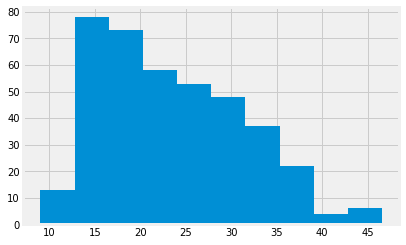

In [36]:
plt.hist(auto.mpg)

In [37]:
auto.mpg.std()

7.805007486571799

In [38]:
sample_means = []


for i in range(1000):
    mean = auto.sample(n=30).mpg.mean()
    sample_means.append(mean)

In [39]:
sample_means2 = [auto.sample(n=30).mpg.mean() for i in range(1000)]

(array([  2.,   2.,   5.,  11.,  24.,  39.,  72., 103., 101., 124., 112.,
        128.,  94.,  66.,  55.,  28.,  22.,   4.,   4.,   4.]),
 array([18.99666667, 19.42666667, 19.85666667, 20.28666667, 20.71666667,
        21.14666667, 21.57666667, 22.00666667, 22.43666667, 22.86666667,
        23.29666667, 23.72666667, 24.15666667, 24.58666667, 25.01666667,
        25.44666667, 25.87666667, 26.30666667, 26.73666667, 27.16666667,
        27.59666667]),
 <a list of 20 Patch objects>)

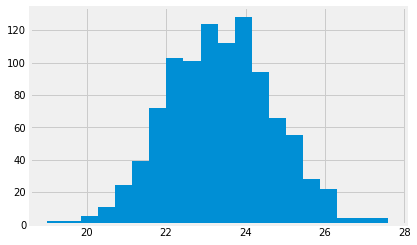

In [42]:
plt.hist(sample_means, bins = 20)
#looks very different than orig distr

In [46]:
np.std(sample_means,ddof=1)
#std dev of sample means not full raw set

1.350871970631041

(array([  5.,   9.,  28.,  36.,  56.,  86., 118., 129., 146., 103.,  93.,
         70.,  53.,  27.,  24.,   9.,   6.,   1.,   0.,   1.]),
 array([19.8       , 20.24183333, 20.68366667, 21.1255    , 21.56733333,
        22.00916667, 22.451     , 22.89283333, 23.33466667, 23.7765    ,
        24.21833333, 24.66016667, 25.102     , 25.54383333, 25.98566667,
        26.4275    , 26.86933333, 27.31116667, 27.753     , 28.19483333,
        28.63666667]),
 <a list of 20 Patch objects>)

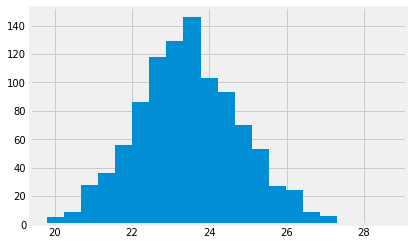

In [44]:
plt.hist(sample_means2, bins = 20)
#still looks different from above

In [47]:
np.std(sample_means, ddof=1)

1.350871970631041

In [50]:
7.805/np.sqrt(29)
#calculates std error
#gets pretty close to std dev
#29 = dof (30 samples)

1.4493521144718897

In [51]:
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

%matplotlib inline

(array([  4.,  16.,  63., 175., 225., 240., 160.,  83.,  26.,   8.]),
 array([18.99666667, 19.85666667, 20.71666667, 21.57666667, 22.43666667,
        23.29666667, 24.15666667, 25.01666667, 25.87666667, 26.73666667,
        27.59666667]),
 <a list of 10 Patch objects>)

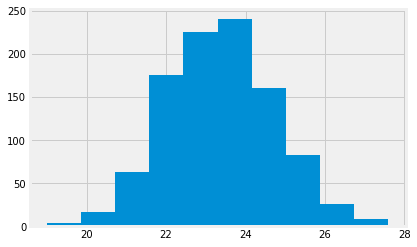

In [52]:
plt.hist(sample_means)

In [56]:
sample.mpg.mean()
#above uses sample size 100 1000x - gets us much closer to auto mean

24.146666666666665

In [55]:
auto.mpg.mean()

23.44591836734694

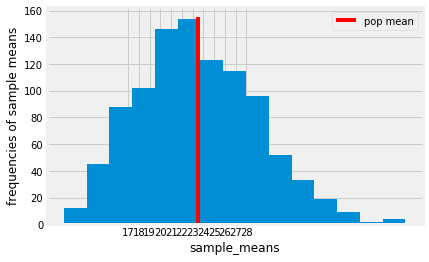

In [58]:
# %load -r 9-22 supplement.py
# taking repeating samples from auto dataset
thousand_rand_samp = [auto.sample(n=2).mpg.mean() for i in range(1000)]
#do for 2 observations 1000x 

bars = plt.hist(thousand_rand_samp, bins = 15)

plt.vlines(x=mu, ymin=0,
           ymax=bars[0].max() + 1,
           color='r', label='pop mean')
plt.xticks(range(17, 29))
plt.xlabel('sample_means')
plt.ylabel('frequencies of sample means')

plt.legend()
plt.show()

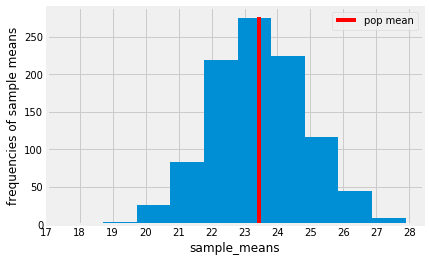

In [64]:
thousand_rand_samp = [auto.sample(n=30,replace=True).mpg.mean() for i in range(1000)]
#as we get to 30 observations and beyond things start looking more like
#normal distribution
#30 is a magic number for wahtever reason
bars = plt.hist(thousand_rand_samp)

plt.vlines(x=mu, ymin=0,
           ymax=bars[0].max() + 1,
           color='r', label='pop mean')
plt.xticks(range(17, 29))
plt.xlabel('sample_means')
plt.ylabel('frequencies of sample means')

plt.legend()
plt.show()

In [65]:
sigma = auto.mpg.std()


standard_error = sigma / (np.sqrt(30))

standard_error

1.424992887297358

In [66]:
# Calculate confidence interval
confidence_interval_lower = sample.mpg.mean() - 2*standard_error

confidence_interval_upper = sample.mpg.mean() + 2*standard_error
#we know with some degree of certainty that true mean lies between
#lower and upper confidence interval
#band will get narrower and narrower with mroe observations

In [67]:
confidence_interval_lower

21.296680892071947

In [68]:
confidence_interval_upper

26.996652441261382

In [69]:
confidence_interval_lower_2 = sample2.mpg.mean() - 2*standard_error

confidence_interval_upper_2 = sample2.mpg.mean() + 2*standard_error

In [70]:
sample3 = auto.sample(n=30)

confidence_interval_lower_3 = sample3.mpg.mean() - 2*standard_error

confidence_interval_upper_3 = sample3.mpg.mean() + 2*standard_error

In [71]:
confidence_interval_lower_3

19.153347558738613

In [72]:
confidence_interval_upper_3

24.853319107928048

In [73]:
auto.mpg.mean()

23.44591836734694

# Central Limit Theorem

The Central Limit Theorem states: 
>When you add **a large number** of independent random variables, irrespective of the original distribution of these variables, **their sampling mean distribution tends towards a normal distribution** with mean equals to the mean of the original population and the standard deviation equals to $\frac{\sigma}{\sqrt{n}}$.





The standard error of the mean is the standard deviation of the sampling distribution.
The issue is that a sample is not an exact replica of the population. We need to account for the fact that in order to make our estimate of the $\mu$ value possible. Let's break it down:

## Standard Error

$$\sigma _{\bar{X}} = \frac{\sigma }{\sqrt{n}}$$

* $ \sigma _{x}$ = standard error of $\bar{x} $
* $ \sigma $ = standard deviation of population


**What if we do not know the population sigma?**<br>
If we do not know the population standard deviation, we can approximate for it by used the sample standard deviation.

$\sigma _{x} ≈ \frac{s}{\sqrt{n}}$

* s = sample standard deviation

But in this case, distribution shape is not 'normal' anymore. In this case the shape will be call 'T-distribution'. We will study this later in more details.


**Sample size impact on standard error of mean**<br>

Q: How should sample size influence standard error of the mean?


![error](./img/diminishing_error.png)
Important implication: The Standard Error of the mean remains the same as long as the population standard deviation is known and sample size remains the same.


__Note-1__ In the case of finite sampling, we need to adjust the formula for standard error:

<img src="img/standard_deviation_of_x_bar.png" width="650">


__Note-2__ Note that in CLT the shape of initial distribution is not important! With enough sample size we can always achieve a distribution very close to normal one.

<img src="img/clt_with_different.png" width="650">


## Interval Estimation - Confidence Intervals

Q: Let's assume that we have a sample of size=49 and we know the standard deviation of the population is $\sigma = 5$. If we know that sampling mean is $\bar{x} = 20$. What might be a good estimate for the population mean if we also know that the population mean is bigger than 20?

Hint: What do we mean by 'a good estimate'?

[Z-scores](https://www.mathsisfun.com/data/standard-normal-distribution-table.html)

<img src="img/interval_estimation.png" width="650">

Objective is to create a 99% confidence interval around the sample mean of mpg.

In [74]:
x_bar = sample.mpg.mean()
x_bar

24.146666666666665

In [75]:
sigma_mpg = auto.mpg.std(ddof=1)
sigma_mpg

7.805007486571799

In [76]:
n = sample.shape[0]
n

30

In [78]:
# step size
sigma_sampling_mean = sigma / np.sqrt(n-1)
sigma_sampling_mean

1.4493535046933719

In [ ]:
# confidence level %99
z_alpha_2 = 

(array([  4.,  16.,  63., 175., 225., 240., 160.,  83.,  26.,   8.]),
 array([18.99666667, 19.85666667, 20.71666667, 21.57666667, 22.43666667,
        23.29666667, 24.15666667, 25.01666667, 25.87666667, 26.73666667,
        27.59666667]),
 <a list of 10 Patch objects>)

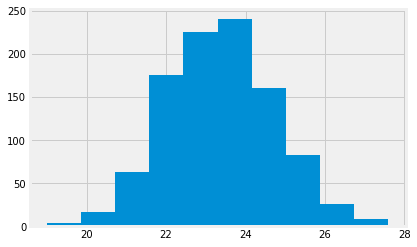

In [79]:
plt.hist(sample_means)

In [80]:
import scipy.stats as stats


In [84]:
# confidence level %99
z_alpha_2 = -stats.norm.ppf(0.01)
z_alpha_2

2.3263478740408408

In [85]:
(x_bar - z_alpha_2 * sigma_sampling_mean, x_bar + z_alpha_2 * sigma_sampling_mean)
#gives range - more certain we want to be - wider range

(20.7749662222896, 27.51836711104373)

In [86]:
auto.mpg.mean()

23.44591836734694

1.959963984540054


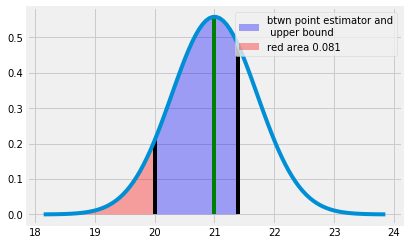

In [87]:
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as stats
import math
%matplotlib inline


# suppose population mu is 21
mu = 21
# sample mean gives us a point estimator
point_estimator = 20

# we know population variance is 49
std_error = 5/(np.sqrt(49))


# how much confidence do we require
confidence = 0.95

# alpha
alpha = 1 - confidence

# due to symmetry we divided alpha by 2
# note that to find z_alpha_over_2 we used
# standard normal distribution

z_alpha_over_2 = np.abs(stats.norm.ppf(alpha/2))

print(z_alpha_over_2)


# upper bound gives us a value so that
# 2*(the area between point_estimator - upper_bound) = confidence

upper_bound = point_estimator + z_alpha_over_2 * std_error

# now let's plot these

# a normal distribution with mean=mu and std=sigma
x = np.linspace(mu - 4*std_error, mu + 4*std_error, 100)
plt.plot(x, stats.norm.pdf(x, mu, std_error))

# a vertical line to mark point estimator
plt.vlines(point_estimator, ymin=0,
           ymax=stats.norm.pdf(point_estimator, mu, std_error))

# a vertical line for population mu
plt.vlines(mu, ymin=0,
           ymax=stats.norm.pdf(mu, mu, std_error),
           color='g')

# a vertical line for upper bound
plt.vlines(upper_bound, ymin=0,
           ymax=stats.norm.pdf(upper_bound,
                               mu, std_error))


# fill the area between upper_bound and point_estimator
plt.fill_between(x=np.linspace(point_estimator, upper_bound, 100),
                 y1=stats.norm.pdf(np.linspace(point_estimator,
                                               upper_bound, 100), mu, std_error),
                 facecolor='blue',
                 alpha=0.35,
                 label='btwn point estimator and\n upper bound')

# fill the area between point estimator and the left of it
plt.fill_between(x=np.linspace(mu - 4*std_error, point_estimator, 100),
                 y1=stats.norm.pdf(np.linspace(
                     mu - 4*std_error, point_estimator, 100), mu, std_error),
                 facecolor='red',
                 alpha=0.35,
                 label='red area %.3f' % (stats.norm.cdf(point_estimator, mu, std_error)))

plt.legend(loc='upper right')
plt.show()